## Gimpy Captcha

In [2]:
from os import path, walk
from random import randint, choice
from PIL import Image, ImageFont, ImageDraw

In [2]:
import random
import os
from random import randint, choice
from PIL import Image, ImageFont, ImageDraw
from datetime import datetime

now = datetime.now()

def makeGimpyImage(text):
    gimpy_path = './static/images/gimpy/'
    gimpy_lists = os.listdir(gimpy_path)
    gimpy = Image.open(os.path.join(gimpy_path, random.choice(gimpy_lists)))

    FONTS_PATH = "static/fonts"
    fonts_lists = []
    for root, directories, files in os.walk(FONTS_PATH, topdown=True):
        for file in files:
            f_name, f_ext = os.path.splitext(file)
            if f_ext == ".ttf":
                fonts_lists.append(os.path.join(root, file))

    font = ImageFont.truetype(random.choice(fonts_lists), 42)
    draw = ImageDraw.Draw(gimpy)

    width = randint(0,80)
    height = randint(0,140)
    text = text.lower()
    draw.text((width, height),text,(255,255,255),font=font)

    filepath = "static/images/captcha/{}_{}.png".format(
        text, now.strftime("%H_%M_%S")
    )

    gimpy.save(filepath)
    return filepath

a = makeGimpyImage('test')

print(a)

static/images/captcha/test_13_51_31.png


### 그레이 + 노이즈 

In [119]:
import random
import os
from random import randint, choice
from PIL import Image, ImageFont, ImageDraw, ImageEnhance, ImageFilter
from datetime import datetime
import cv2
import numpy as np
from skimage.util import random_noise

now = datetime.now()

def makeGrayImage(text):
    FONTS_PATH = "static/fonts"
    fonts_lists = []
    for root, directories, files in os.walk(FONTS_PATH, topdown=True):
        for file in files:
            f_name, f_ext = os.path.splitext(file)
            if f_ext == ".ttf":
                fonts_lists.append(os.path.join(root, file))
                
    text = text.lower()
    text_splited = text.split(" ")

    image = Image.new("RGBA", (512, 256),(255,255,255))
    draw = ImageDraw.Draw(image)

    text = text.lower()
    if len(text_splited) > 1:
        width1 = 0
        width2 = 70
        for i in range(len(text_splited)):
            width = randint(width1, width2)
            height = randint(0, 180)
            font = ImageFont.truetype(random.choice(fonts_lists), 48)
            draw.text(
                (width, height), text_splited[i], (0, 0, 0), font=font
            )
            width1 += 150
            width2 += 130
    else:
        width = randint(0, 150)
        height = randint(0, 180)
        font = ImageFont.truetype(random.choice(fonts_lists), 48)
        draw.text((width, height), text_splited[0], (0, 0, 0), font=font)

    filepath = "static/images/captcha/{}_{}.png".format(
        text, now.strftime("%H_%M_%S")
    )
    color_lists = [
        "#E0D7FF",
        "#FFCCE1",
        "#D7EEFF",
        "#FAFFC7",
        "#ffb3ba",
        "#ffdfba",
        "#ffffba",
        "#baffc9",
        "#bae1ff",
    ]
    line_color = random.choice(color_lists)
    create_noise_curve(image, line_color)
    add_rand_line_to_image(image, line_color=line_color)

    image.save(filepath)
    img = cv2.imread(filepath, 0)
    row , col = img.shape
      
    # Randomly pick some pixels in the
    # image for coloring them white
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(3000, 15000)
    for i in range(number_of_pixels):
        
        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)
          
        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)
          
        # Color that pixel to white
        img[y_coord][x_coord] = 255
          
    # Randomly pick some pixels in
    # the image for coloring them black
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(3000 , 15000)
    for i in range(number_of_pixels):
        
        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)
          
        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)
          
        # Color that pixel to black
        img[y_coord][x_coord] = 0
    cv2.imwrite(filepath, img)

    return filepath

a = makeGrayImage('testEST testEST')

print(a)

static/images/captcha/testest testest_15_55_56.png


In [108]:
import random
import os
from random import randint, choice
from PIL import Image, ImageFont, ImageDraw, ImageEnhance, ImageFilter
from datetime import datetime
import cv2
import numpy as np
from skimage.util import random_noise

now = datetime.now()

def makeGrayImage(text):
    FONTS_PATH = "static/fonts"
    fonts_lists = []
    for root, directories, files in os.walk(FONTS_PATH, topdown=True):
        for file in files:
            f_name, f_ext = os.path.splitext(file)
            if f_ext == ".ttf":
                fonts_lists.append(os.path.join(root, file))
                
    text = text.lower()
    text_splited = text.split(" ")

    image = Image.new("RGBA", (512, 256),(255,255,255))
    draw = ImageDraw.Draw(image)

    text = text.lower()
    if len(text_splited) > 1:
        width1 = 0
        width2 = 70
        for i in range(len(text_splited)):
            width = randint(width1, width2)
            height = randint(0, 180)
            font = ImageFont.truetype(random.choice(fonts_lists), 48)
            draw.text(
                (width, height), text_splited[i], (0, 0, 0), font=font
            )
            width1 += 150
            width2 += 130
    else:
        width = randint(0, 150)
        height = randint(0, 180)
        font = ImageFont.truetype(random.choice(fonts_lists), 48)
        draw.text((width, height), text_splited[0], (0, 0, 0), font=font)

    filepath = "static/images/captcha/{}_{}.png".format(
        text, now.strftime("%H_%M_%S")
    )
    color_lists = [
        "#E0D7FF",
        "#FFCCE1",
        "#D7EEFF",
        "#FAFFC7",
        "#ffb3ba",
        "#ffdfba",
        "#ffffba",
        "#baffc9",
        "#bae1ff",
    ]
    line_color = random.choice(color_lists)
    create_noise_curve(image, line_color)
    add_rand_line_to_image(image, line_color=line_color)
    create_noise_curve(image, line_color)
    add_rand_line_to_image(image, line_width=4, line_color=line_color)
    
    image.save(filepath)
    img = cv2.imread(filepath, 0)

    rows, cols = img.shape[:2]
    
    # ---① 설정 값 셋팅
    exp = round(random.uniform(0.5,2),1)      # 볼록, 오목 지수 (오목 : 0.1 ~ 1, 볼록 : 1.1~)
    scale = 1           # 변환 영역 크기 (0 ~ 1)

    
    # 매핑 배열 생성 ---②
    mapy, mapx = np.indices((rows, cols),dtype=np.float32)

    # 좌상단 기준좌표에서 -1~1로 정규화된 중심점 기준 좌표로 변경 ---③
    mapx = 2*mapx/(cols-1)-1
    mapy = 2*mapy/(rows-1)-1

    # 직교좌표를 극 좌표로 변환 ---④
    r, theta = cv2.cartToPolar(mapx, mapy)

    # 왜곡 영역만 중심확대/축소 지수 적용 ---⑤
    r[r< scale] = r[r<scale] **exp  

    # 극 좌표를 직교좌표로 변환 ---⑥
    mapx, mapy = cv2.polarToCart(r, theta)

    # 중심점 기준에서 좌상단 기준으로 변경 ---⑦
    mapx = ((mapx + 1)*cols-1)/2
    mapy = ((mapy + 1)*rows-1)/2
    # 재매핑 변환
    distorted = cv2.remap(img,mapx,mapy,cv2.INTER_LINEAR)

    # cv2.imwrite(filepath, img_sinx)
    # cv2.imwrite(filepath, img_cosy)
    cv2.imwrite(filepath, distorted)
    
    return filepath

a = makeGrayImage('testEST testEST')

print(a)

static/images/captcha/testest testest_17_03_45.png


In [109]:
import time
for i in range(1,50):
    time.sleep(0.5)
    makeGrayImage('testEST testEST')

In [2]:
def create_noise_curve(image, color):
    w, h = image.size
    x1 = random.randint(0, int(w / 5))
    x2 = random.randint(w - int(w / 5), w)
    y1 = random.randint(int(h / 5), h - int(h / 5))
    y2 = random.randint(y1, h - int(h / 5))
    points = [x1, y1, x2, y2]
    end = random.randint(160, 200)
    start = random.randint(0, 20)
    ImageDraw.Draw(image).arc(points, start, end, fill=color)
    return image

In [3]:
def add_rand_line_to_image(
    image, line_width=2, line_color="rgb(224, 187, 228)"
):
    """Draw a random line to a PIL image."""
    # Get line random start position
    line_x0 = randint(0, image.width)
    line_y0 = randint(0, image.height)
    # If line x0 is in center-to-right
    if line_x0 >= image.width / 2:
        # Line x1 from 0 to line_x0 position - 20% of image width
        line_x1 = randint(0, line_x0 - int(0.2 * image.width))
    else:
        # Line x1 from line_x0 position + 20% of image width to max image width
        line_x1 = randint(line_x0 + int(0.2 * image.width), image.width)
    # If line y0 is in center-to-bottom
    if line_y0 >= image.height / 2:
        # Line y1 from 0 to line_y0 position - 20% of image height
        line_y1 = randint(0, line_y0 - int(0.2 * image.height))
    else:
        # Line y1 from line_y0 position + 20% of image height to max image height
        line_y1 = randint(line_y0 + int(0.2 * image.height), image.height)
    # Generate a rand line color if not provided
    # if line_color == "notSet":
    #     line_color = "rgb({}, {}, {})".format(
    #         str(randint(0, 255)), str(randint(0, 255)), str(randint(0, 255))
    #     )
    # Get image draw interface and draw the line on it
    draw = ImageDraw.Draw(image)
    draw.line(
        (line_x0, line_y0, line_x1, line_y1),
        fill=line_color,
        width=line_width,
    )

In [3]:
image = create_captcha_image('test', "#E0D7FF", "#bae1ff")

NameError: name 'create_captcha_image' is not defined

In [ ]:
def create_noise_curve(image, color):
    w, h = image.size
    x1 = random.randint(0, int(w / 5))
    x2 = random.randint(w - int(w / 5), w)
    y1 = random.randint(int(h / 5), h - int(h / 5))
    y2 = random.randint(y1, h - int(h / 5))
    points = [x1, y1, x2, y2]
    end = random.randint(160, 200)
    start = random.randint(0, 20)
    ImageDraw.Draw(image).arc(points, start, end, fill=color)
    return image


In [ ]:
def add_rand_line_to_image(image, line_width=2, line_color='rgb(224, 187, 228)'):
    """Draw a random line to a PIL image."""
    # Get line random start position
    line_x0 = randint(0, image.width)
    line_y0 = randint(0, image.height)
    # If line x0 is in center-to-right
    if line_x0 >= image.width / 2:
        # Line x1 from 0 to line_x0 position - 20% of image width
        line_x1 = randint(0, line_x0 - int(0.2 * image.width))
    else:
        # Line x1 from line_x0 position + 20% of image width to max image width
        line_x1 = randint(line_x0 + int(0.2 * image.width), image.width)
    # If line y0 is in center-to-bottom
    if line_y0 >= image.height / 2:
        # Line y1 from 0 to line_y0 position - 20% of image height
        line_y1 = randint(0, line_y0 - int(0.2 * image.height))
    else:
        # Line y1 from line_y0 position + 20% of image height to max image height
        line_y1 = randint(line_y0 + int(0.2 * image.height), image.height)
    # Generate a rand line color if not provided
    if line_color == "notSet":
        line_color = "rgb({}, {}, {})".format(
            str(randint(0, 255)), str(randint(0, 255)), str(randint(0, 255))
        )
    # Get image draw interface and draw the line on it
    draw = ImageDraw.Draw(image)
    draw.line(
        (line_x0, line_y0, line_x1, line_y1),
        fill=line_color,
        width=line_width,
    )

def add_rand_horizontal_line_to_image(image, line_width=2,  line_color='rgb(224, 187, 228)'):
    """Draw a random line to a PIL image."""
    # Get line random start position (x between 0 and 20% image width; y with full height range)
    x0 = randint(0, int(0.2 * image.width))
    y0 = randint(0, image.height)
    # Get line end position (x1 symetric to x0; y random from y0 to image height)
    x1 = image.width - x0
    y1 = randint(y0, image.height)
    # Generate a rand line color if not provided
    if line_color == "notSet":
        line_color = "rgb({}, {}, {})".format(
            str(randint(0, 255)), str(randint(0, 255)), str(randint(0, 255))
        )
    # Get image draw interface and draw the line on it
    draw = ImageDraw.Draw(image)
    draw.line((x0, y0, x1, y1), fill=line_color, width=5)

In [ ]:
text = "chicken breast"
text = text.lower()
text_splited = text.split(' ')
print(text_splited[1])

gimpy_path = './static/images/gimpy/'
gimpy_lists = os.listdir(gimpy_path)
gimpy = Image.open(os.path.join(gimpy_path, random.choice(gimpy_lists)))
FONTS_PATH = "static/fonts"
fonts_lists = []

for root, directories, files in os.walk(FONTS_PATH, topdown=True):
    for file in files:
        f_name, f_ext = os.path.splitext(file)
        if f_ext == ".ttf":
            fonts_lists.append(os.path.join(root, file))

font = ImageFont.truetype(random.choice(fonts_lists), 42)
draw = ImageDraw.Draw(gimpy)
print(random.choice(fonts_lists))

if len(text_splited) > 1:
    width1 = 0
    width2 = 40
    for i in range(len(text_splited)):
        width = randint(width1,width2)
        height = randint(0,140)
        draw.text((width, height),text_splited[i],'rgb(255,255,255)',font=font)
        width1 += 100
        width2 += 170
        print(text[i])
else:
    width = randint(0,80)
    height = randint(0,140)
    draw.text((width, height),text_splited[0],'rgb(255,255,255)',font=font)

add_rand_line_to_image(gimpy)
create_noise_curve(gimpy,'#E0BBE4')
gimpy

In [4]:
# -*- coding: utf-8 -*-

"""
Script:
generator.py
Description:
Just an image captcha generator.
Author:
Jose Miguel Rios Rubio
Creation date:
08/09/2018
Last modified date:
10/06/2019
"""

####################################################################################################

# Modules Imports #

from os import path, walk
from random import randint, choice
from PIL import Image, ImageFont, ImageDraw

####################################################################################################

# Constants #

# Actual constant.py full path
# Path to generate Captchas
GEN_CAPTCHAS_FOLDER = "./captcha_img"

SCRIPT_PATH = path.dirname(path.realpath(GEN_CAPTCHAS_FOLDER))

# Fonts directory and list of used fonts files
FONTS_PATH = SCRIPT_PATH + "/fonts"

# Captcha with noise (turn it on add delay)
ADD_NOISE = False

# Captcha 16:9 resolution sizes (captcha_size_num -> 0 to 12)
CAPTCHA_SIZE = [(256, 144), (426, 240), (640, 360), (768, 432), (800, 450), (848, 480), \
            (960, 540), (1024, 576), (1152, 648), (1280, 720), (1366, 768), (1600, 900), \
            (1920, 1080)]

# Font sizes range for each size
FONT_SIZE_RANGE = [(30, 45), (35, 80), (75, 125), (80, 140), (85, 150), (90, 165), (100, 175), \
               (110, 185), (125, 195), (135, 210), (150, 230), (165, 250), (180, 290)]

# Difficult levels captcha generation values (<lines in full img>, <circles in full img>)
DIFFICULT_LEVELS_VALUES = [(0, 0), (1, 10), (2, 17), (3, 25), (4, 50), (5, 70)]

####################################################################################################

# Image Captcha Generator Class #

class CaptchaGenerator:
    """
    Just and image captcha generator class.
    """

    def __init__(self, captcha_size_num=2):
        """Constructor"""
        # Limit provided captcha size num
        if captcha_size_num < 0:
            captcha_size_num = 0
        elif captcha_size_num >= len(CAPTCHA_SIZE):
            captcha_size_num = len(CAPTCHA_SIZE) - 1
        # Get captcha size
        self.captcha_size = CAPTCHA_SIZE[captcha_size_num]
        # Determine one char image height
        fourth_size = self.captcha_size[0] / 4
        if fourth_size - int(fourth_size) <= 0.5:
            fourth_size = int(fourth_size)
        else:
            fourth_size = int(fourth_size) + 1
        self.one_char_image_size = (fourth_size, fourth_size)
        # Determine font size according to image size
        font_size_min = FONT_SIZE_RANGE[captcha_size_num][0]
        font_size_max = FONT_SIZE_RANGE[captcha_size_num][1]
        self.font_size_range = (font_size_min, font_size_max)
        # Get available Fonts files recursively from fonts directories
        self.l_fonts = []
        for root, directories, files in walk(FONTS_PATH, topdown=True):
            for file in files:
                f_name, f_ext = path.splitext(file)
                if f_ext == ".ttf":
                    self.l_fonts.append(path.join(root, file))
        #print("")
        #print("Detected fonts to be used:")
        #print("---------------------------")
        #for f in self.l_fonts:
        #    print(f)
        #print("")


    def gen_rand_color(self, min_val=0, max_val=255):
        '''Generate a random color.'''
        gen_color = { "color" : "", "R": -1, "G" : -1, "B": -1 }
        gen_color["R"] = randint(min_val, max_val)
        gen_color["G"] = randint(min_val, max_val)
        gen_color["B"] = randint(min_val, max_val)
        gen_color["color"] = "rgb({}, {}, {})".format(str(gen_color["R"]), str(gen_color["G"]), \
                                                    str(gen_color["B"]))
        return gen_color


    def gen_rand_contrast_color(self, from_color):
        '''Generate a random dark or light color for a exact contrast.'''
        dark_level = self.color_dark_level(from_color["R"], from_color["G"], from_color["B"])
        color = "rgb(0, 0, 0)"
        if dark_level == -3:
            color = self.gen_rand_color(0, 42)
        elif dark_level == -2:
            color = self.gen_rand_color(42, 84)
        elif dark_level == -1:
            color = self.gen_rand_color(84, 126)
        elif dark_level == 1:
            color = self.gen_rand_color(126, 168)
        elif dark_level == 2:
            color = self.gen_rand_color(168, 210)
        elif dark_level == 3:
            color = self.gen_rand_color(210, 255)
        return color


    def gen_rand_custom_contrast_color(self, from_color):
        '''Generate a random dark or light color for a custom contrast.'''
        # Get light-dark tonality level of the provided color
        dark_level = self.color_dark_level(from_color["R"], from_color["G"], from_color["B"])
        # If it is a dark color
        if dark_level >= 1:
            # from_color -> (255 - 384) -> (85 - 128)
            color = self.gen_rand_color(148, 255)
            # For high dark
            if dark_level == 3:
                # from_color -> (0 - 128) -> (0 - 42)
                color = self.gen_rand_color(62, 255)
        # If it is a light color
        elif dark_level <= -1:
            # from_color -> (384 - 640) -> (128 - 213)
            color = self.gen_rand_color(0, 108)
            # For high light
            if dark_level == -3:
                # from_color -> (640 - 765) -> (213 - 255)
                color = self.gen_rand_color(0, 193)
        return color


    def color_dark_level(self, r, g, b):
        '''Determine provided color dark tonality level from -3 to 3 (-3 ultra light, \
        -2 mid light, -1 low light, 1 low dark, 2 mid dark, 3 high dark).'''
        dark_level = 0
        if r + g + b < 384:
            dark_level = 1
            if r + g + b < 255:
                dark_level = 2
                if r + g + b < 128:
                    dark_level = 3
            return True
        else:
            dark_level = -1
            if r + g + b > 512:
                dark_level = -2
                if r + g + b > 640:
                    dark_level = -3
        return dark_level


    def color_is_dark(self, r, g, b):
        '''Determine if a provided color has a dark tonality.'''
        # Medium tonality for RGB in 0-255 range -> (255/2)*3 = 384
        if r + g + b < 384:
            return True
        else:
            return False


    def gen_rand_font(self, fonts_list):
        '''Pick a random font file path from provided folder and given possible fonts list.'''
        font_num = randint(0, len(fonts_list)-1)
        font = fonts_list[font_num]
        return font


    def gen_rand_size_font(self, font_path, min_size, max_size):
        '''Generate a random size font PIL object from the given font file path.'''
        font_size = randint(min_size, max_size)
        try:
            font = ImageFont.truetype(font_path, font_size)
            print(font_size)
            # font = ImageFont.truetype(font_path, font_size, encoding='utf8')
            
        except OSError:
            print("Incompatible font for captcha. Using standard arial.ttf")
            font = ImageFont.truetype("arial.ttf", font_size)
            # font = ImageFont.truetype("arial.ttf", font_size, encoding='utf8')
        return font


    def create_image_char(self, size, background, character, char_color, char_pos, char_font):
        '''Create a PIL image object of specified size and color that has the provided character \
        in.'''
        image = Image.new("RGBA", size, background)
        draw = ImageDraw.Draw(image)
        draw.text(char_pos, character, fill=char_color, font=char_font)
        return image


    def add_rand_circle_to_image(self, image, min_size, max_size, circle_color="notSet"):
        '''Draw a random circle to a PIL image.'''
        x = randint(0, image.width)
        y = randint(0, image.height)
        rad = randint(min_size, max_size)
        if circle_color == "notSet":
            circle_color = "rgb({}, {}, {})".format(str(randint(0, 255)), str(randint(0, 255)), \
                                                    str(randint(0, 255)))
        draw = ImageDraw.Draw(image)
        draw.ellipse((x, y, x+rad, y+rad), fill=circle_color, outline=circle_color)


    def add_rand_ellipse_to_image(self, image, w_min, w_max, h_min, h_max, ellipse_color="notSet"):
        '''Draw a random ellipse to a PIL image.'''
        x = randint(0, image.width)
        y = randint(0, image.height)
        w = randint(w_min, w_max)
        h = randint(h_min, h_max)
        if ellipse_color == "notSet":
            ellipse_color = "rgb({}, {}, {})".format(str(randint(0, 255)), str(randint(0, 255)), \
                                                    str(randint(0, 255)))
        draw = ImageDraw.Draw(image)
        draw.ellipse((x, y, x+w, y+h), fill=ellipse_color, outline=ellipse_color)


    def add_rand_line_to_image(self, image, line_width=5, line_color="notSet"):
        '''Draw a random line to a PIL image.'''
        # Get line random start position
        line_x0 = randint(0, image.width)
        line_y0 = randint(0, image.height)
        # If line x0 is in center-to-right
        if line_x0 >= image.width/2:
            # Line x1 from 0 to line_x0 position - 20% of image width
            line_x1 = randint(0, line_x0 - int(0.2*image.width))
        else:
            # Line x1 from line_x0 position + 20% of image width to max image width
            line_x1 = randint(line_x0 + int(0.2*image.width), image.width)
        # If line y0 is in center-to-bottom
        if line_y0 >= image.height/2:
            # Line y1 from 0 to line_y0 position - 20% of image height
            line_y1 = randint(0, line_y0 - int(0.2*image.height))
        else:
            # Line y1 from line_y0 position + 20% of image height to max image height
            line_y1 = randint(line_y0 + int(0.2*image.height), image.height)
        # Generate a rand line color if not provided
        if line_color == "notSet":
            line_color = "rgb({}, {}, {})".format(str(randint(0, 255)), str(randint(0, 255)), \
                                                str(randint(0, 255)))
        # Get image draw interface and draw the line on it
        draw = ImageDraw.Draw(image)
        draw.line((line_x0, line_y0, line_x1, line_y1), fill=line_color, width=line_width)


    def add_rand_horizontal_line_to_image(self, image, line_width=5, line_color="notSet"):
        '''Draw a random line to a PIL image.'''
        # Get line random start position (x between 0 and 20% image width; y with full height range)
        x0 = randint(0, int(0.2*image.width))
        y0 = randint(0, image.height)
        # Get line end position (x1 symetric to x0; y random from y0 to image height)
        x1 = image.width - x0
        y1 = randint(y0, image.height)
        # Generate a rand line color if not provided
        if line_color == "notSet":
            line_color = "rgb({}, {}, {})".format(str(randint(0, 255)), str(randint(0, 255)), \
                                                str(randint(0, 255)))
        # Get image draw interface and draw the line on it
        draw = ImageDraw.Draw(image)
        draw.line((x0, y0, x1, y1), fill=line_color, width=5)


    def add_rand_noise_to_image(self, image, num_pixels):
        '''Add noise pixels to a PIL image.'''
        draw = ImageDraw.Draw(image)
        for _ in range(0, num_pixels):
            pixel_color = "rgb({}, {}, {})".format(str(randint(0, 255)), str(randint(0, 255)), \
                                                   str(randint(0, 255)))
            draw.point((randint(0, image.width), randint(0, image.height)), pixel_color)


    def images_join_horizontal(self, list_images):
        '''Horizontally join PIL images from list provided and create a single image from them.'''
        image = Image.new("RGB", (self.one_char_image_size[0]*len(list_images), \
                                  self.one_char_image_size[1]))
        x_offset = 0
        for img in list_images:
            image.paste(img, (x_offset, 0))
            x_offset += img.size[0]
        return image


    def gen_captcha_char_image(self, character, image_size, lines=2, background_color=False,
            rotation_limits=(-44, 44)):
        '''Generate an one-char image with a random positioned-rotated character.'''
        # If not background color provided, generate a random one
        if not background_color:
            background_color = self.gen_rand_color()
        rand_color = self.gen_rand_custom_contrast_color(background_color)
        character_color = rand_color["color"]
        # character_pos = (int(image_size[0]/16), randint(0, int(image_size[0]/16)))
        character_pos = (0, 0)
        
        # Pick a random font with a random size, from the provided list
        rand_font_path = self.gen_rand_font(self.l_fonts)
        print(rand_font_path)
        # rand_font_path = 'C:/Users/Jay/Desktop/project/fonts/GoogleFonts/ofl/bonbon\Bonbon-Regular.ttf'
        character_font = self.gen_rand_size_font(rand_font_path, self.font_size_range[0], \
                self.font_size_range[1])
        
        # Create an image of specified size, background color and character
        image = self.create_image_char(image_size, background_color["color"], character, \
                character_color, character_pos, character_font)
        print(character_pos)
        # Random rotate the created image between -55? and +55?
        image = image.rotate(randint(rotation_limits[0], rotation_limits[1]), \
                fillcolor=background_color["color"])
        # Add some random lines to image
        for _ in range(0, lines):
            self.add_rand_line_to_image(image, 3, character_color)
        # Add noise pixels to the image
        if ADD_NOISE:
            self.add_rand_noise_to_image(image, 200)
        # Return the generated image
        generated_captcha = {"image": image, "character": character}
        return generated_captcha

    ################################################################################################

    def gen_captcha_image(self, input_text=None, difficult_level=2, chars_mode="nums", multicolor=False, \
            margin=True):
        '''Generate an image captcha.'''
        # Limit difficult level argument if out of expected range
        if difficult_level > 5:
            print("INFO: Captcha generation for a higher difficult level than expected.")
            print("      Using difficult level 5.")
            print("")
            difficult_level = 5
        # If invalid chars mode provided, use numbers
        chars_mode = chars_mode.lower()
        if (chars_mode != "nums") and (chars_mode != "hex") and (chars_mode != "ascii") and (chars_mode !="custom"):
            chars_mode = "nums"
        # Determine one char image height
        fourth_size = self.captcha_size[0] / len(input_text)
        
        print(fourth_size)
        
        if fourth_size - int(fourth_size) <= 0.5:
            fourth_size = int(fourth_size) - 1
        else:
            fourth_size = int(fourth_size) + 1
        self.one_char_image_size = (fourth_size, fourth_size)
                
        # Generate a RGB background color if the multicolor is disabled
        if not multicolor:
            image_background = self.gen_rand_color()
            
            print(image_background)
            
        # Generate 4 one-character images with a random char color in contrast to the generated
        # background, a random font and font size, and random position-rotation
        one_char_images = []
        image_characters = ""
        if chars_mode == "custom":
            print(chars_mode)
            for i in range(len(input_text)):
                character = input_text[i]
                # Generate a random character, a random character color in contrast to background
                # and a random position for it
                if multicolor:
                    image_background = self.gen_rand_color()
                captcha = self.gen_captcha_char_image(character, self.one_char_image_size, 1, \
                        image_background)
                image = captcha["image"]
                image_characters = image_characters + captcha["character"]
                # Add the generated image to the list
                one_char_images.append(image)
                # image.save("./captcha_img/{0}.png".format(character + str(i)), "png")
        else:
            for _ in range(0,4):
                # Generate a random character
                if chars_mode == "nums":
                    character = str(randint(0, 9))
                elif chars_mode == "hex":
                    characters_availables = "ABCDEF0123456789"
                    character = choice(characters_availables)
                elif chars_mode == "ascii":
                    characters_availables = "ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789"
                    character = choice(characters_availables)
                # Generate a RGB background color for each iteration if multicolor enabled
                if multicolor:
                    image_background = self.gen_rand_color()
                # Generate a random character, a random character color in contrast to background
                # and a random position for it
                captcha = self.gen_captcha_char_image(character, self.one_char_image_size, 2, \
                        image_background)
                image = captcha["image"]
                image_characters = image_characters + captcha["character"]
                # Add the generated image to the list
                one_char_images.append(image)
                
        # Join the 4 characters images into one
        image = self.images_join_horizontal(one_char_images)
        # Add one horizontal random line to full image
        for _ in range(0, DIFFICULT_LEVELS_VALUES[difficult_level][0]):
            self.add_rand_horizontal_line_to_image(image, randint(1, 5))
        # Add some random circles to the image
        for _ in range(0, DIFFICULT_LEVELS_VALUES[difficult_level][1]):
            self.add_rand_circle_to_image(image, int(0.05*self.one_char_image_size[0]), \
                                          int(0.15*self.one_char_image_size[1]))
        # # Add horizontal margins
        # if margin:
        #     new_image = Image.new('RGBA', self.captcha_size, "rgb(0, 0, 0)")
        #     new_image.paste(image, (0, int((self.captcha_size[1]/2) - (image.height/2))))
        #     image = new_image
            
        generated_captcha = {"image": image, "characters": image_characters}
        return generated_captcha

## 3D modeling 

c:\users\jay\anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  from ipykernel import kernelapp as app
c:\users\jay\anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


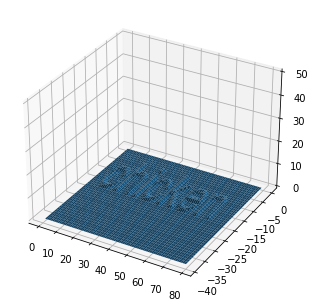

In [5]:
import numpy
import pylab
from PIL import Image, ImageDraw, ImageFont
import mpl_toolkits.mplot3d.axes3d as axes3d

img = Image.new('L', (80, 40), 255)
drw = ImageDraw.Draw(img)
font = ImageFont.truetype('arial.ttf', 20)
drw.text((5, 1), 'chicken', font = font)

X, Y = numpy.meshgrid(range(80), range(40))
Z = 1 - numpy.asarray(img) / 255

fig = pylab.figure()
ax = axes3d.Axes3D(fig)
ax.plot_surface(X, -Y, Z, rstride = 1, cstride = 1)
ax.set_zlim((0, 50))

fig.show()

c:\users\jay\anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.


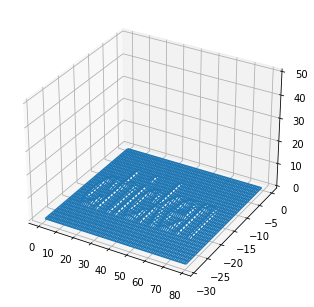

In [6]:
import numpy, pylab
from PIL import Image, ImageDraw, ImageFont
import mpl_toolkits.mplot3d.axes3d as axes3d

sz = (80,30)

img = Image.new('L', sz, 255)
drw = ImageDraw.Draw(img)
font = ImageFont.truetype("arial.ttf", 20)

drw.text((5,3), 'chicken', font=font)
img.save('./test.png')

X , Y = numpy.meshgrid(range(sz[0]),range(sz[1]))
Z = 1-numpy.asarray(img)/255

fig = pylab.figure()
ax = axes3d.Axes3D(fig)
ax.plot_wireframe(X, -Y, Z, rstride=1, cstride=1)
ax.set_zlim((0,50))
fig.savefig('./test2.png')

c:\users\jay\anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.


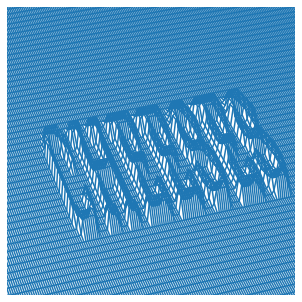

In [7]:
from random import uniform, shuffle
from PIL import ImageFont, Image, ImageDraw
import numpy, pylab
from mpl_toolkits.mplot3d import Axes3D

def makeImage(text, width=512, height=200, angle=None):
    angle = angle if angle != None else uniform(-50, -10)
    try:
        font = ImageFont.truetype('C:/Users/Jay/Desktop/Captcha/static/fonts/GoogleFonts/ofl/graduate\Graduate-Regular.ttf', 25)
    except IOError:
        raise IOError(
            'Font file doesn\'t exist. Please set `fontPath` correctly.')
    txtW, txtH = font.getsize(text)
    img = Image.new('L', (txtW * 3, txtH * 3), 255)
    drw = ImageDraw.Draw(img)
    drw.text((txtW, txtH), text, font=font)

    fig = pylab.figure(figsize=(width/120.0, height/50.0))
    ax = Axes3D(fig)
    X, Y = numpy.meshgrid(range(img.size[0]), range(img.size[1]))
    Z = 1 - numpy.asarray(img) / 255
    ax.plot_wireframe(X, -Y, Z, rstride=1, cstride=1)
    ax.set_zlim((-3, 3))
    ax.set_xlim((txtW * 1.1, txtW * 1.9))
    ax.set_ylim((-txtH * 1.9, -txtH * 1.1))
    ax.set_axis_off()
    ax.view_init(elev=40, azim=-60 + angle)
    fig.savefig('./{}.png'.format(text))
    return fig
fig = makeImage('cheeses')


In [8]:
GEN_CAPTCHAS_FOLDER = "./captcha_img"

SCRIPT_PATH = path.dirname(path.realpath(GEN_CAPTCHAS_FOLDER))

# Fonts directory and list of used fonts files
FONTS_PATH = SCRIPT_PATH + "/fonts"

# Captcha with noise (turn it on add delay)
ADD_NOISE = False

# Captcha 16:9 resolution sizes (captcha_size_num -> 0 to 12)
CAPTCHA_SIZE = [(256, 144), (426, 240), (640, 360), (768, 432), (800, 450), (848, 480), \
            (960, 540), (1024, 576), (1152, 648), (1280, 720), (1366, 768), (1600, 900), \
            (1920, 1080)]

# Font sizes range for each size
FONT_SIZE_RANGE = [(30, 45), (35, 80), (75, 125), (80, 140), (85, 150), (90, 165), (100, 175), \
               (110, 185), (125, 195), (135, 210), (150, 230), (165, 250), (180, 290)]

# Difficult levels captcha generation values (<lines in full img>, <circles in full img>)
DIFFICULT_LEVELS_VALUES = [(0, 0), (1, 10), (2, 17), (3, 25), (4, 50), (5, 70)]

l_fonts = []
for root, directories, files in walk(FONTS_PATH, topdown=True):
    for file in files:
        f_name, f_ext = path.splitext(file)
        if f_ext == ".ttf":
            l_fonts.append(path.join(root, file))


def gen_rand_font(fonts_list):
    '''Pick a random font file path from provided folder and given possible fonts list.'''
    font_num = randint(0, len(fonts_list)-1)
    font = fonts_list[font_num]
    return font

font = gen_rand_font(l_fonts)
font

ValueError: empty range for randrange() (0,0, 0)

In [ ]:
from captcha.image import ImageCaptcha
from PIL import ImageFont

# Create an image instance of the gicen size
image = ImageCaptcha(width=280, height=90, fonts=font)
print(image)

capt_text = 'test'
# generate the image of the given text
data = image.generate(capt_text)

In [ ]:
data

In [1]:
import os
file_path = './static/images/img_captcha/'
file_names = os.listdir(file_path)
file_names

['a sense of alienation',
 'circle',
 'criminal tool',
 'dinosaur',
 'exclamation_mark',
 'favorite color',
 'female',
 'fire_work',
 'fish',
 'fortune_cookie',
 'hole',
 'insect',
 'kkumdori',
 'male',
 'Rumpelstiltskin',
 'santa',
 'signpost',
 'vertical line',
 'worker']

In [2]:
i = 1
for name in file_names:
    src = os.path.join(file_path, name)
    dst = str(i) + '.png'
    dst = os.path.join(file_path, dst)
    os.rename(src, dst)
    i += 1

In [ ]:
from PIL import Image

def crop(path, input, height, width, k, page, area):
    im = Image.open(input)
    imgwidth, imgheight = im.size
    for i in range(0,imgheight,height):
        for j in range(0,imgwidth,width):
            box = (j, i, j+width, i+height)
            a = im.crop(box)
            try:
                o = a.crop(area)
                o.save(os.path.join(path,"PNG","%s" % page,"IMG-%s.png" % k))
            except:
                pass
            k +=1

In [ ]:
im = Image.open('test2.png')
imgwidth, imgheight = im.size
print(im.size)
for i in range(0,imgheight,height):
    for j in range(0,imgwidth,width):
        box = (j, i, j+width, i+height)
        a = im.crop(box)
        try:
            o = a.crop(area)
            o.save(os.path.join(path,"PNG","%s" % page,"IMG-%s.png" % k))
        except:
            pass
        k +=1

In [ ]:
import image_slicer
image_slicer.slice('test2.png',16)

In [8]:

def imgcrop(input, xPieces, yPieces, save_dir):
    filename, file_extension = os.path.splitext(input)
    im = Image.open(input)
    imgwidth, imgheight = im.size
    height = imgheight // yPieces
    width = imgwidth // xPieces
    for i in range(0, yPieces):
        for j in range(0, xPieces):
            box = (j * width, i * height, (j + 1) * width, (i + 1) * height)
            a = im.crop(box)
            try:
                a.save(os.path.join(save_dir, f'{filename}_{i}_{j}{file_extension}'))
            except:
                pass

In [ ]:
imgcrop('test2.png', 4,4,'')

### 이미지 리사이즈

In [2]:
import os
from PIL import Image
folder_path = './static/images/img_captcha/'
folders = os.listdir(folder_path)

In [3]:
for folder in folders:
    imgs = os.listdir(os.path.join(folder_path, folder))
    for img in imgs:
        img_path = os.path.join(folder_path,folder,img)
        img = Image.open(img_path)
        title, ext = os.path.splitext(img_path)
        print(title, ext)
        img_resize = img.resize((1024, 1024))
        img_resize.save(title+"_resized"+ext)

./static/images/img_captcha/a sense of alienation\a sense of alienation_resized .png
./static/images/img_captcha/circle\circle .jpg
./static/images/img_captcha/criminal tool\criminal tool_resized .png
./static/images/img_captcha/dinosaur\dinosaur .png
./static/images/img_captcha/exclamation_mark\exclamation mark .jpg
./static/images/img_captcha/favorite color\favorite color_resized .png
./static/images/img_captcha/favorite color_resized\favorite color_resized .png
./static/images/img_captcha/female\female_resized .png
./static/images/img_captcha/fire_work\fire work .png
./static/images/img_captcha/fish\fish .png
./static/images/img_captcha/fortune_cookie\fortune cookie .png
./static/images/img_captcha/hole\hole .png
./static/images/img_captcha/insect\insect .jpg
./static/images/img_captcha/kkumdori\kkumdori_resized .png
./static/images/img_captcha/male\male_resized .png
./static/images/img_captcha/Rumpelstiltskin\Rumpelstiltskin_resized .png
./static/images/img_captcha/santa\Santa .png